In [20]:
import pandas as pd
dfc=pd.read_excel("/Users/apple/iCloud Drive (Archive)/Desktop/2019科研/第二本交通工程方法研究基于python著作2019/排队模型投稿/122congestions.xlsx")
dfc.head(4)

,序号,报警时间,案发地点
0,1,2018-08-01 10:18:00,3号航站楼()12345转述
1,2,2018-08-03 13:09:00,机场二号航站楼停车场前
2,3,2018-08-03 14:35:00,机场高速三号航站楼去往二号航站楼匝道
3,4,2018-08-03 17:15:00,机场辅路华宜桥路口


In [21]:
import pandas as pd
all_hour=pd.date_range('20180801', '20190802',freq='1H') ##还有几个参数Y、M、D等
all_hour

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2019-08-01 15:00:00', '2019-08-01 16:00:00',
               '2019-08-01 17:00:00', '2019-08-01 18:00:00',
               '2019-08-01 19:00:00', '2019-08-01 20:00:00',
               '2019-08-01 21:00:00', '2019-08-01 22:00:00',
               '2019-08-01 23:00:00', '2019-08-02 00:00:00'],
              dtype='datetime64[ns]', length=8785, freq='H')

In [22]:
import numpy as np
all_122s=pd.DataFrame({"time":all_hour,'counts': np.zeros(len(all_hour),)})
all_122s

,time,counts
0,2018-08-01 00:00:00,0.0
1,2018-08-01 01:00:00,0.0
2,2018-08-01 02:00:00,0.0
3,2018-08-01 03:00:00,0.0
4,2018-08-01 04:00:00,0.0
...,...,...
8780,2019-08-01 20:00:00,0.0
8781,2019-08-01 21:00:00,0.0
8782,2019-08-01 22:00:00,0.0
8783,2019-08-01 23:00:00,0.0


In [23]:
import datetime
all_122s["time_new"]=all_122s["time"].apply(lambda x:datetime.datetime.strftime(x,'%Y-%m-%d %H'))##变为datetime型可以不用循环直接用pd.to_datetime(Series,format)
all_122s["date"]=all_122s["time"].apply(lambda x:datetime.datetime.strftime(x,'%Y-%m-%d'))##需要看看每天（freq=24）稳定性情况，用到函数gourpby（），首先需要将new_allac增加一列关于日期的，这样便于统计
all_122s

,time,counts,time_new,date
0,2018-08-01 00:00:00,0.0,2018-08-01 00,2018-08-01
1,2018-08-01 01:00:00,0.0,2018-08-01 01,2018-08-01
2,2018-08-01 02:00:00,0.0,2018-08-01 02,2018-08-01
3,2018-08-01 03:00:00,0.0,2018-08-01 03,2018-08-01
4,2018-08-01 04:00:00,0.0,2018-08-01 04,2018-08-01
...,...,...,...,...
8780,2019-08-01 20:00:00,0.0,2019-08-01 20,2019-08-01
8781,2019-08-01 21:00:00,0.0,2019-08-01 21,2019-08-01
8782,2019-08-01 22:00:00,0.0,2019-08-01 22,2019-08-01
8783,2019-08-01 23:00:00,0.0,2019-08-01 23,2019-08-01


In [24]:
import datetime
# pd.to_datetime(new_ahour["time"],'%Y-%m-%d %H:%M:%S')
dfc["time_new"]=dfc["报警时间"].apply(lambda x:datetime.datetime.strftime(x,'%Y-%m-%d %H'))
dfc['counts']=np.ones(dfc.shape[0],)
dfc

,序号,报警时间,案发地点,time_new,counts
0,1,2018-08-01 10:18:00,3号航站楼()12345转述,2018-08-01 10,1.0
1,2,2018-08-03 13:09:00,机场二号航站楼停车场前,2018-08-03 13,1.0
2,3,2018-08-03 14:35:00,机场高速三号航站楼去往二号航站楼匝道,2018-08-03 14,1.0
3,4,2018-08-03 17:15:00,机场辅路华宜桥路口,2018-08-03 17,1.0
4,5,2018-08-05 17:43:00,首都机场华谊桥,2018-08-05 17,1.0
...,...,...,...,...,...
573,574,2019-07-26 17:31:00,机场货运北路海航基地至1号航站楼,2019-07-26 17,1.0
574,575,2019-07-27 13:30:00,机场货运路顺丰速运,2019-07-27 13,1.0
575,576,2019-07-31 17:08:00,货运北路2号航站楼,2019-07-31 17,1.0
576,577,2019-08-01 02:08:00,机场高速主路1号后街楼(12345转述),2019-08-01 02,1.0


In [25]:
new_allcc=pd.merge(all_122s,dfc,on="time_new",how="outer")##perfect，但是left和right次序不能改变，left可以理解为母体
new_allcc[1:20]

,time,counts_x,time_new,date,序号,报警时间,案发地点,counts_y
1,2018-08-01 01:00:00,0.0,2018-08-01 01,2018-08-01,NaN,NaT,NaN,NaN
2,2018-08-01 02:00:00,0.0,2018-08-01 02,2018-08-01,NaN,NaT,NaN,NaN
3,2018-08-01 03:00:00,0.0,2018-08-01 03,2018-08-01,NaN,NaT,NaN,NaN
4,2018-08-01 04:00:00,0.0,2018-08-01 04,2018-08-01,NaN,NaT,NaN,NaN
5,2018-08-01 05:00:00,0.0,2018-08-01 05,2018-08-01,NaN,NaT,NaN,NaN
6,2018-08-01 06:00:00,0.0,2018-08-01 06,2018-08-01,NaN,NaT,NaN,NaN
7,2018-08-01 07:00:00,0.0,2018-08-01 07,2018-08-01,NaN,NaT,NaN,NaN
8,2018-08-01 08:00:00,0.0,2018-08-01 08,2018-08-01,NaN,NaT,NaN,NaN
9,2018-08-01 09:00:00,0.0,2018-08-01 09,2018-08-01,NaN,NaT,NaN,NaN
10,2018-08-01 10:00:00,0.0,2018-08-01 10,2018-08-01,1.0,2018-08-01 10:18:00,3号航站楼()12345转述,1.0


In [26]:
new_allcc["counts_y"].fillna(0,inplace=True)##将所有次数的NaN转变为0
new_allcc[5:20]

,time,counts_x,time_new,date,序号,报警时间,案发地点,counts_y
5,2018-08-01 05:00:00,0.0,2018-08-01 05,2018-08-01,NaN,NaT,NaN,0.0
6,2018-08-01 06:00:00,0.0,2018-08-01 06,2018-08-01,NaN,NaT,NaN,0.0
7,2018-08-01 07:00:00,0.0,2018-08-01 07,2018-08-01,NaN,NaT,NaN,0.0
8,2018-08-01 08:00:00,0.0,2018-08-01 08,2018-08-01,NaN,NaT,NaN,0.0
9,2018-08-01 09:00:00,0.0,2018-08-01 09,2018-08-01,NaN,NaT,NaN,0.0
10,2018-08-01 10:00:00,0.0,2018-08-01 10,2018-08-01,1.0,2018-08-01 10:18:00,3号航站楼()12345转述,1.0
11,2018-08-01 11:00:00,0.0,2018-08-01 11,2018-08-01,NaN,NaT,NaN,0.0
12,2018-08-01 12:00:00,0.0,2018-08-01 12,2018-08-01,NaN,NaT,NaN,0.0
13,2018-08-01 13:00:00,0.0,2018-08-01 13,2018-08-01,NaN,NaT,NaN,0.0
14,2018-08-01 14:00:00,0.0,2018-08-01 14,2018-08-01,NaN,NaT,NaN,0.0


In [27]:
new_allcc.time = pd.to_datetime(new_allcc.time,format="%Y%m%d %H:%M:%S")
new_allcc1=new_allcc.set_index('time')
new_allcc1

,counts_x,time_new,date,序号,报警时间,案发地点,counts_y
time,,,,,,,
2018-08-01 00:00:00,0.0,2018-08-01 00,2018-08-01,NaN,NaT,NaN,0.0
2018-08-01 01:00:00,0.0,2018-08-01 01,2018-08-01,NaN,NaT,NaN,0.0
2018-08-01 02:00:00,0.0,2018-08-01 02,2018-08-01,NaN,NaT,NaN,0.0
2018-08-01 03:00:00,0.0,2018-08-01 03,2018-08-01,NaN,NaT,NaN,0.0
2018-08-01 04:00:00,0.0,2018-08-01 04,2018-08-01,NaN,NaT,NaN,0.0
...,...,...,...,...,...,...,...
2019-08-01 20:00:00,0.0,2019-08-01 20,2019-08-01,NaN,NaT,NaN,0.0
2019-08-01 21:00:00,0.0,2019-08-01 21,2019-08-01,NaN,NaT,NaN,0.0
2019-08-01 22:00:00,0.0,2019-08-01 22,2019-08-01,NaN,NaT,NaN,0.0


In [29]:
allcc_H=new_allcc1.resample('H').sum()##按小时
allcc_H.to_excel("c122_h_count.xlsx")
allcc_H["counts_y"].max()

13.0

In [39]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
##小时的稳定性
dftest=adfuller(allcc_H["counts_y"])
dftest
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
        values 0, 1, ..., maxlag.
    
        * If "AIC" (default)

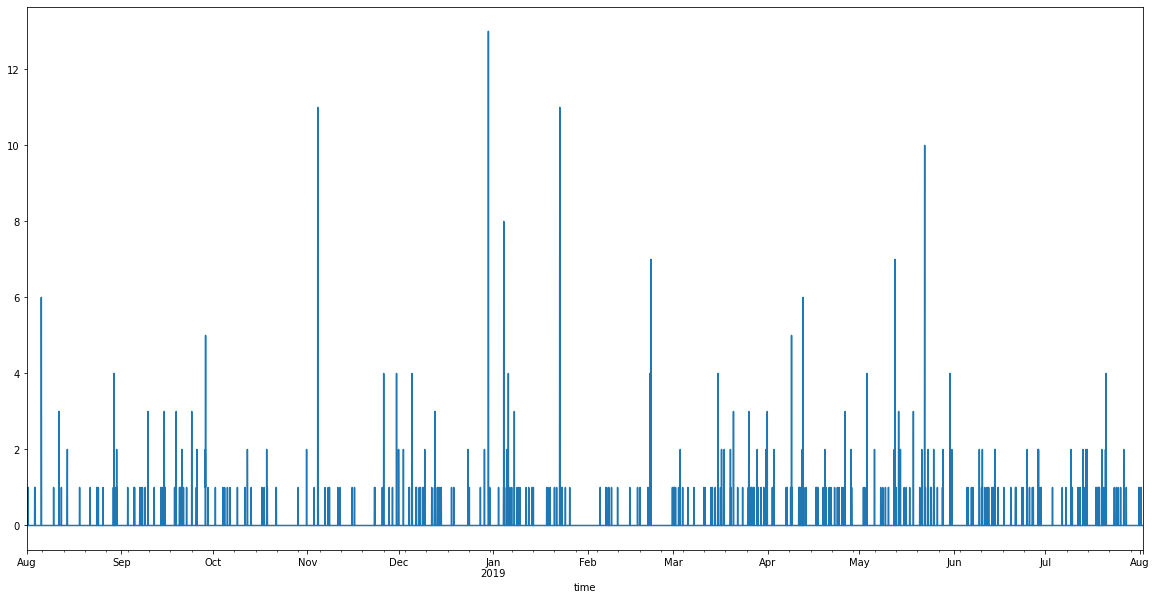

In [31]:
plt.figure(figsize=(20,10))
allcc_H["counts_y"].plot()
plt.show()

In [32]:
allcc_B=new_allcc1.resample('B').sum()##按小时
allcc_B.to_excel("c122_bday.xlsx")
dftest=adfuller(allcc_B["counts_y"])
dftest

(-4.290492187738597,
 0.00046135769999738684,
 9,
 253,
 {'1%': -3.4564641849494113,
  '5%': -2.873032730098417,
  '10%': -2.572894516864816},
 1292.9437601972263)

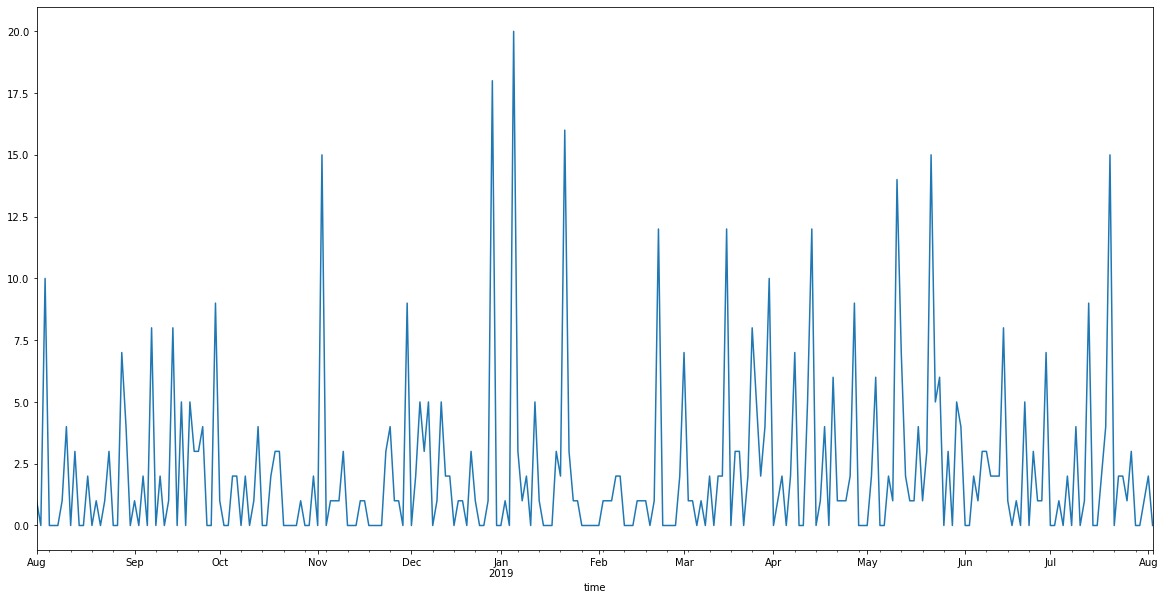

In [33]:
plt.figure(figsize=(20,10))
allcc_B["counts_y"].plot()
plt.show()

In [34]:
allcc_W=new_allcc1.resample('W').sum()##按小时
dftest=adfuller(allcc_W["counts_y"])
dftest

(-7.811537455825375,
 7.048337694446988e-12,
 0,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 285.7396599108083)

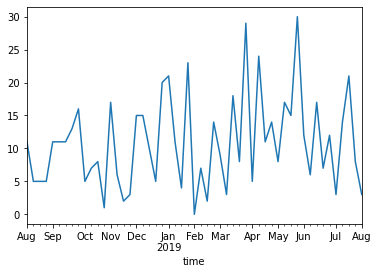

In [35]:
allcc_W["counts_y"].plot()
plt.show()

In [36]:
allcc_W=new_allcc1.resample('D').sum()##按小时
dftest=adfuller(allcc_W["counts_y"])
dftest

(-17.356525010058306,
 5.233891871431689e-30,
 0,
 366,
 {'1%': -3.448343869853195,
  '5%': -2.869469418606909,
  '10%': -2.570994248260623},
 1634.4762833548011)

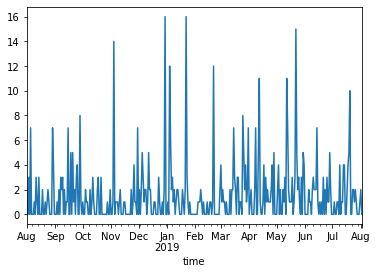

In [37]:
allcc_W["counts_y"].plot()
plt.show()

<div>----------------------------------------------------------------</div>

In [7]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
df_o= pd.read_excel('c122_bday.xlsx')
print(df_o.shape)

(263, 4)


0     1
1     0
2    10
3     0
4     0
Name: counts_y, dtype: int64

In [4]:
#一、数据准备
df=df_o["counts_y"]
datas = df.values

#归一化处理

max_value = np.max(datas)

min_value = np.min(datas)
scalar = max_value - min_value
datas = list(map(lambda x: x / scalar, datas))

#数据集和目标值赋值，dataset为数据，look_back为以几行数据为特征维度数量

def creat_dataset(dataset,look_back):
    data_x=[]
    data_y=[]
    for i in range(len(dataset)-look_back):
        data_x.append(dataset[i:i+look_back])
        data_y.append(dataset[i+look_back])
#     print("x:{},y:{}",data_x,data_y)
    return np.asarray(data_x), np.asarray(data_y) #转为ndarray数据
    
#以2为特征维度，得到数据集

dataX, dataY = creat_dataset(datas,5)
print("dataX",dataX)
print("dataY",dataY)

train_size = int(len(dataX)*0.7)

x_train = dataX[:train_size] #训练数据
y_train = dataY[:train_size] #训练数据目标值

x_train = x_train.reshape(-1, 1, 5) #将训练数据调整成pytorch中lstm算法的输入维度
# print(x_train)
y_train = y_train.reshape(-1, 1, 1)  #将目标值调整成pytorch中lstm算法的输出维度
# print(y_train)
 #将ndarray数据转换为张量，因为pytorch用的数据类型是张量

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

 

#二、创建LSTM模型

class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__() #面向对象中的继承
        self.lstm = nn.LSTM(5,6,2) #输入数据5个特征维度，6个隐藏层维度，2个LSTM串联，第二个LSTM接收第一个的计算结果
        self.out = nn.Linear(6,1) #线性拟合，接收数据的维度为6，输出数据的维度为1
    def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        out = self.out(x1.view(-1,c)) #因为线性层输入的是个二维数据，所以此处应该将lstm输出的三维数据x1调整成二维数据，最后的特征维度不能变
        out1 = out.view(a,b,-1) #因为是循环神经网络，最后的时候要把二维的out调整成三维数据，下一次循环使用
        return out1

rnn = RNN()

#参数寻优，计算损失函数

optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.02)
loss_func = nn.MSELoss()

 

 #三、训练模型

for i in range(1000):
    var_x = Variable(x_train).type(torch.FloatTensor)
    var_y = Variable(y_train).type(torch.FloatTensor)
    out = rnn(var_x)
    loss = loss_func(out,var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100==0:
        print('Epoch:{}, Loss:{:.5f}'.format(i+1, loss.item()))
        

dataX [[0.05 0.   0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.  ]
 [0.5  0.   0.   0.   0.05]
 ...
 [0.1  0.05 0.15 0.   0.  ]
 [0.05 0.15 0.   0.   0.05]
 [0.15 0.   0.   0.05 0.1 ]]
dataY [0.   0.05 0.2  0.   0.15 0.   0.   0.1  0.   0.05 0.   0.05 0.15 0.
 0.   0.35 0.2  0.   0.05 0.   0.1  0.   0.4  0.   0.1  0.   0.05 0.4
 0.   0.25 0.   0.25 0.15 0.15 0.2  0.   0.   0.45 0.05 0.   0.   0.1
 0.1  0.   0.1  0.   0.05 0.2  0.   0.   0.1  0.15 0.15 0.   0.   0.
 0.   0.05 0.   0.   0.1  0.   0.75 0.   0.05 0.05 0.05 0.15 0.   0.
 0.   0.05 0.05 0.   0.   0.   0.   0.15 0.2  0.05 0.05 0.   0.45 0.
 0.1  0.25 0.15 0.25 0.   0.05 0.25 0.1  0.1  0.   0.05 0.05 0.   0.15
 0.05 0.   0.   0.05 0.9  0.   0.   0.05 0.   1.   0.15 0.05 0.1  0.
 0.25 0.05 0.   0.   0.   0.15 0.1  0.8  0.15 0.05 0.05 0.   0.   0.
 0.   0.   0.05 0.05 0.05 0.1  0.1  0.   0.   0.   0.05 0.05 0.05 0.
 0.05 0.6  0.   0.   0.   0.   0.1  0.35 0.05 0.05 0.   0.05 0.   0.1
 0.   0.1  0.1  0.6  0.   0.15 0.15 0.   0.1  0.4 

(1, 5)
(258, 5)
(259, 5)
(259, 1, 5)
pred.shape torch.Size([259, 1, 1])
pred_testhshape (259,)
dataYshape (258,)
[0.12001272]


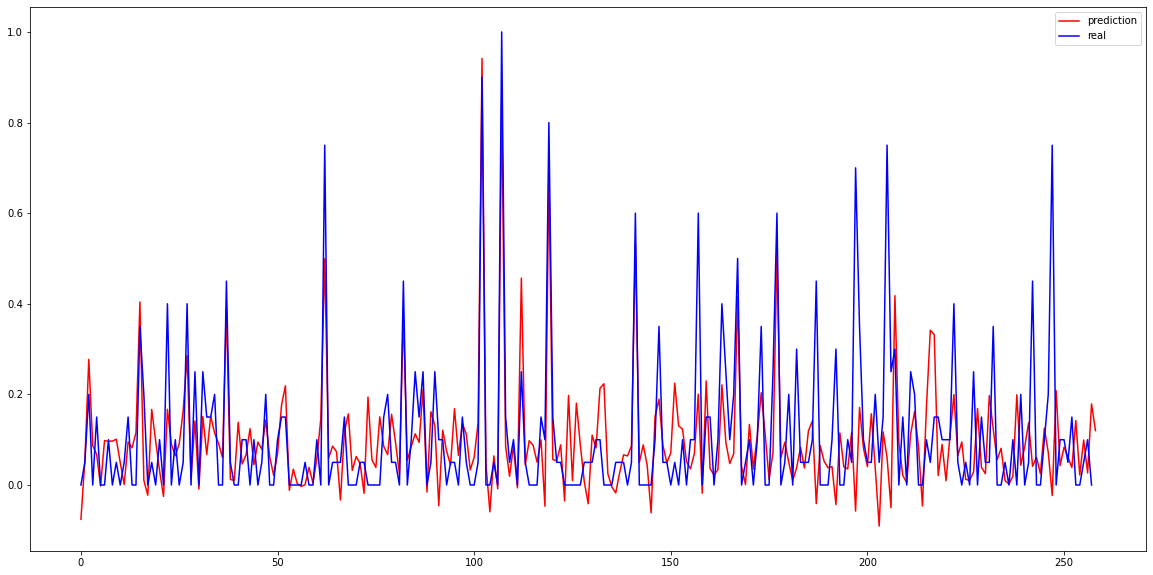

In [5]:
#四、模型测试

#准备测试数据
# print(datas[-5:])
dataX_add=np.array([datas[-5:]])
print(dataX_add.shape)
# np.expand_dims(dataX_add,axis=0)
print(dataX.shape)
dataX_new=np.concatenate((dataX,dataX_add),axis=0)
print(dataX_new.shape)
# print(dataX_new)
# np.asarray
dataX1 = dataX_new.reshape(-1,1,5)
print(dataX1.shape)
dataX2 = torch.from_numpy(dataX1)
var_dataX = Variable(dataX2).type(torch.FloatTensor)

# print() 

pred = rnn(var_dataX)
# print("datax",dataX1[-10:])
# print("pred",pred[-10:])
print("pred.shape",pred.shape)
pred_test = pred.view(-1).data.numpy()  #转换成一维的ndarray数据，这是预测值
# print(pred_test)
#dataY为真实值
print("pred_testhshape",pred_test.shape)
# np.concatenate((,b)) 
print("dataYshape",dataY.shape)
print(pred_test[-1:])
#五、画图检验
plt.figure(figsize=(20,10))
plt.plot(pred.view(-1).data.numpy(), 'r', label='prediction')
plt.plot(dataY.reshape(-1), 'b', label='real')
plt.legend(loc='best')
plt.show()